# EDA on Tesla Stock Data from 2010 - 2020

In [2]:
# Import the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import datetime as dt

##### Dataset loading and processing segment

In [3]:
# load the dataset

Data = pd.read_csv("/Users/abpandey4/Downloads/Data Science /Extensive EDA Analysis on TESLA Stock Data/TSLA.csv")


In [4]:
# View the Dataset

Data    # 2417 rows x 7 columns

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.000000,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.420000,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.920000,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.100000,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.000000,15.830000,16.110001,16.110001,6866900
5,2010-07-07,16.400000,16.629999,14.980000,15.800000,15.800000,6921700
6,2010-07-08,16.139999,17.520000,15.570000,17.459999,17.459999,7711400
7,2010-07-09,17.580000,17.900000,16.549999,17.400000,17.400000,4050600
8,2010-07-12,17.950001,18.070000,17.000000,17.049999,17.049999,2202500
9,2010-07-13,17.389999,18.639999,16.900000,18.139999,18.139999,2680100


In [5]:
# here we are checking the datatypes of the variables 

Data.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [6]:
# Convert the 'Date' column to 'datetime' object

Data['Date'] = pd.to_datetime(Data['Date'])
Data.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [7]:
# Get the Statistical describe of 'Data'

Data.describe(include = 'all')

,Date,Open,High,Low,Close,Adj Close,Volume
count,2416,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2.416000e+03
unique,2416,NaN,NaN,NaN,NaN,NaN,NaN
top,2016-11-14 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN
first,2010-06-29 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
last,2020-02-03 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,186.271147,189.578224,182.916639,186.403651,186.403651,5.572722e+06
std,NaN,118.740163,120.892329,116.857591,119.136020,119.136020,4.987809e+06
min,NaN,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,NaN,34.342498,34.897501,33.587501,34.400002,34.400002,1.899275e+06


In [8]:
# Checkinh the null values 

Data.isnull().values.sum()

# so we can see that there is no null values we can proceed

0

##### Variation of Stock Trade over Time

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1197764a8>,
      dtype=object)

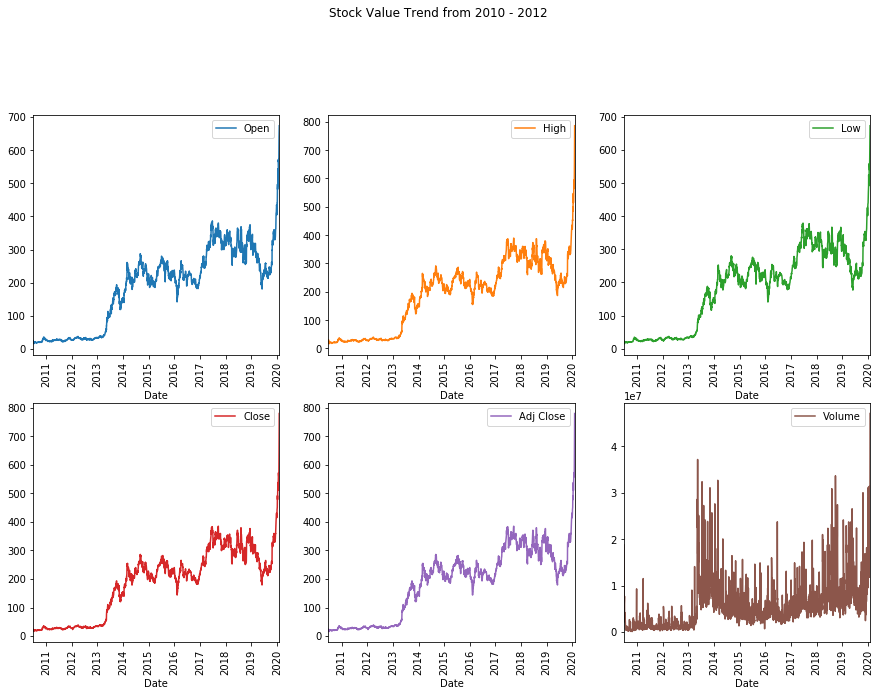

In [9]:
# Create a list of numerical variable that are to be visualised



Column_List = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

Data.plot(x = "Date", y = Column_List, subplots = True, layout = (3, 3), figsize = (15, 15), sharex = False, title = "Stock Value Trend from 2010 - 2012" , rot = 90)

/Users/abpandey4/Applications/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


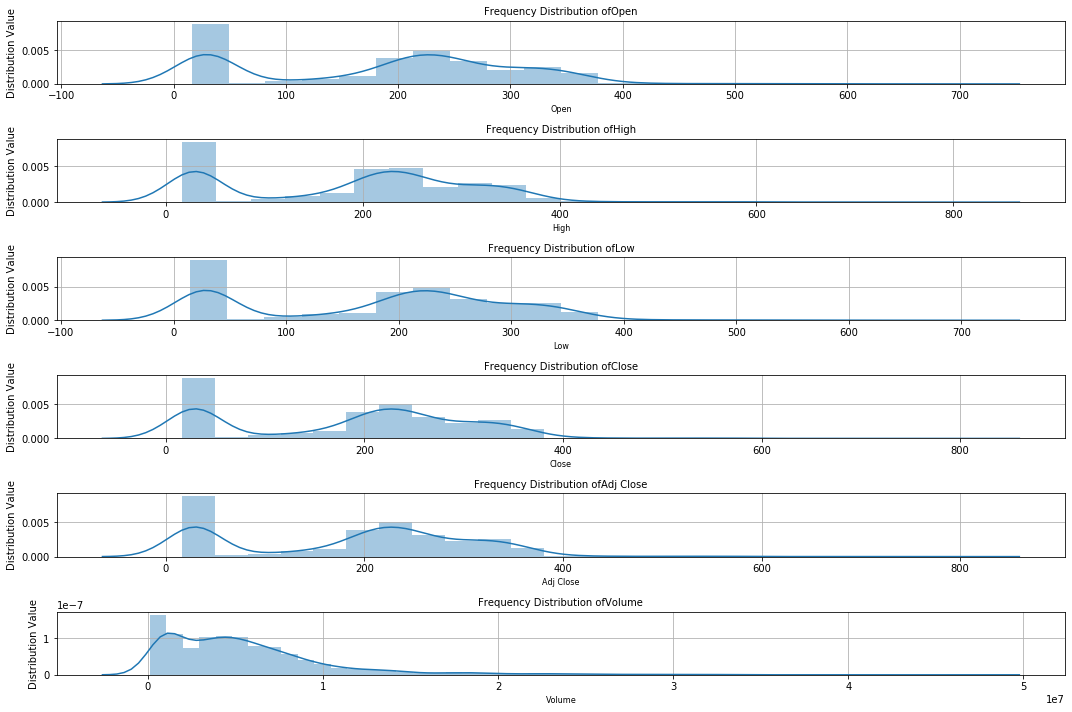

In [10]:
# visualised the spread and skeweness through the seaborn library distribution plot

fig, ax = plt.subplots(len(Column_List) , figsize = (15,10))

for i, col_list in enumerate(Column_List):
    sns.distplot(Data[col_list] , hist = True , ax = ax[i])
    ax[i].set_title('Frequency Distribution of'+''+ col_list , fontsize = 10)
    ax[i].set_xlabel(col_list , fontsize = 8)
    ax[i].set_ylabel('Distribution Value' , fontsize = 10)
    fig.tight_layout(pad = 1.1)      # to provide space between plots 
    ax[i].grid('on')

##### Correlation Analysis 

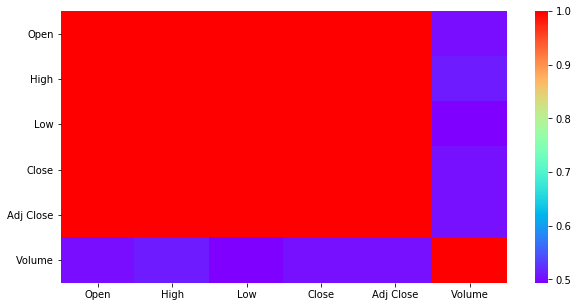

In [11]:
# Check for factors responsible in overall Volume trade

fig , ax = plt.subplots(figsize = (10,5))
corr_matrix = Data.corr()

# Plotting the correlation matrix in the heatmap for better understanding 

sns.heatmap(corr_matrix,xticklabels=corr_matrix.columns.values,yticklabels=corr_matrix.columns.values,cmap = 'rainbow' )

In [12]:
# View the matrix table to identify numericals value of the above heatmap

Data.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999425,0.999575,0.998886,0.998886,0.501762
High,0.999425,1.000000,0.999389,0.999640,0.999640,0.512944
Low,0.999575,0.999389,1.000000,0.999447,0.999447,0.493496
Close,0.998886,0.999640,0.999447,1.000000,1.000000,0.505169
Adj Close,0.998886,0.999640,0.999447,1.000000,1.000000,0.505169
Volume,0.501762,0.512944,0.493496,0.505169,0.505169,1.000000


##### Outliers Detecion and Removal

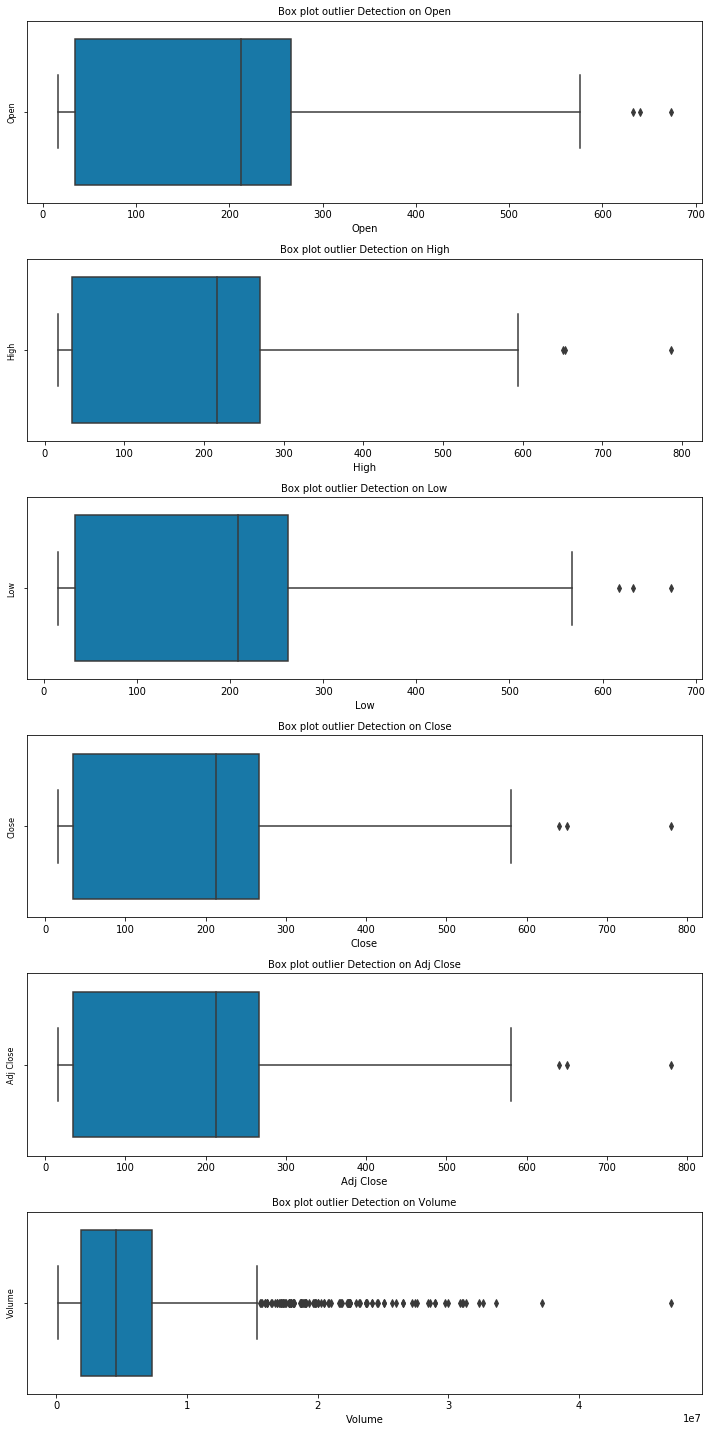

In [13]:
# generate the Box plot to detect the outliers 

fig ,ax = plt.subplots(len(Column_List),figsize = (10,20))

for i, col_list in enumerate(Column_List):
    sns.boxplot(Data[col_list], ax = ax[i] , palette = 'winter',orient = 'h')
    ax[i].set_title('Box plot outlier Detection on ' +''+ col_list,fontsize = 10)
    ax[i].set_ylabel(col_list,fontsize =8)
    fig.tight_layout(pad = 1.1) 
    

##### Extensive Analysis on the data 


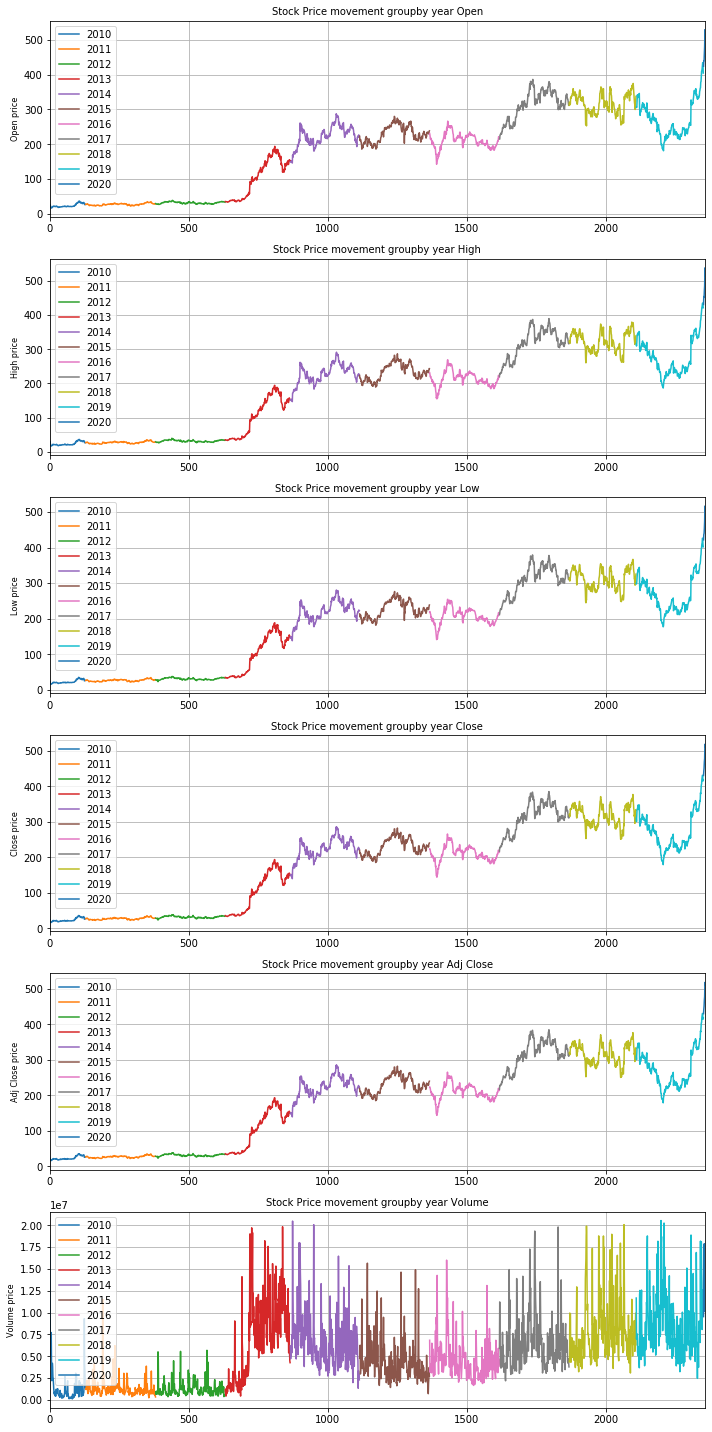

In [34]:
# Since the data is a time series data , we should be able to predict future through forecasting techniques 

# Decomposing the time series year-wise and month-wise to analyse further 

Data['year'] = Data['Date'].dt.year 
Data['month'] = Data['Date'].dt.month
Data['weekday'] = Data['Date'].dt.weekday

# First, plot the data year-wise to see the duaration when it hiked and dipped 

fig , ax = plt.subplots(len(Column_List),figsize = (10,20))

for i,col_list in enumerate(Column_List):
    Data.groupby('year')[col_list].plot(ax = ax[i],legend = True)
    ax[i].set_title('Stock Price movement groupby year' +' '+ col_list , fontsize = 10)
    ax[i].set_ylabel(col_list +' '+ 'price',fontsize = 8)
    fig.tight_layout(pad = 1.1)
    ax[i].yaxis.grid(True)
    ax[i].xaxis.grid(True)

In [39]:
Data['year'] = Data['Date'].dt.year 
Data['month'] = Data['Date'].dt.month
Data['weekday'] = Data['Date'].dt.weekday
Data

,index,Date,Open,High,Low,Close,Adj Close,Volume,year,month,weekday
0,0,2010-06-29,19.000000,25.000000,17.540001,23.889999,23.889999,18766300,2010,6,1
1,1,2010-06-30,25.790001,30.420000,23.299999,23.830000,23.830000,17187100,2010,6,2
2,2,2010-07-01,25.000000,25.920000,20.270000,21.959999,21.959999,8218800,2010,7,3
3,3,2010-07-02,23.000000,23.100000,18.709999,19.200001,19.200001,5139800,2010,7,4
4,4,2010-07-06,20.000000,20.000000,15.830000,16.110001,16.110001,6866900,2010,7,1
5,5,2010-07-07,16.400000,16.629999,14.980000,15.800000,15.800000,6921700,2010,7,2
6,6,2010-07-08,16.139999,17.520000,15.570000,17.459999,17.459999,7711400,2010,7,3
7,7,2010-07-09,17.580000,17.900000,16.549999,17.400000,17.400000,4050600,2010,7,4
8,8,2010-07-12,17.950001,18.070000,17.000000,17.049999,17.049999,2202500,2010,7,0
9,9,2010-07-13,17.389999,18.639999,16.900000,18.139999,18.139999,2680100,2010,7,1
